# Análisis Exploratorio de Combustibles

Laboratorio 01 – Series de Tiempo.

Esteban Zambrano 22119
Edwin Ortega 22305

- **Período:** Ene‑2001 → Dic‑2024
- **Variables:** Gasolina regular, gasolina súper, diésel alto azufre (importación y consumo)

### Configuración y carga de datos

Se convierten ceros en Diesel_Con (oct‑dic 2024) a NaN al asumir que son datos faltantes.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Configuración de gráficos
plt.rcParams["figure.figsize"] = (8, 4)

# Cargar datos
df = pd.read_csv("../data/clean/Series_de_Tiempo_Combustibles.csv", encoding="utf-8")
df["fecha"] = pd.to_datetime(df["fecha"])
df = df[(df["fecha"] >= "2001-01-01") & (df["fecha"] <= "2024-12-31")].copy()
df.set_index("fecha", inplace=True)

# Convertir ceros sospechosos a NaN
df["Diesel_Con"].replace(0, np.nan, inplace=True)

df.head()

C:\Users\esteb\AppData\Local\Temp\ipykernel_25752\3954005798.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Diesel_Con"].replace(0, np.nan, inplace=True)


,Regular_Imp,Superior_Imp,Diesel_Imp,Regular_Con,Superior_Con,Diesel_Con
fecha,,,,,,
2001-01-01,177776.50,373963.96,566101.99,164547.351667,300242.781667,569328.787024
2001-02-01,123115.99,243091.07,489525.80,174838.811667,301483.401667,597749.831786
2001-03-01,161726.42,312084.38,575559.68,201992.651667,355572.831667,736085.973214
2001-04-01,127338.74,285054.89,437745.42,198683.391667,355826.761667,606257.658929
2001-05-01,168730.19,300913.67,552609.13,182504.091667,336040.041667,664082.657500


### Descripción estadistica

In [26]:
desc_stats = df.describe().T
desc_stats

,count,mean,std,min,25%,50%,75%,max
Regular_Imp,288.0,412949.327027,243262.697677,81015.300000,208206.887500,327559.340,576117.0975,1.141366e+06
Superior_Imp,288.0,490954.382872,156558.109587,170292.500000,369329.855000,481300.210,608305.2925,1.227174e+06
Diesel_Imp,288.0,554121.703458,409757.128034,0.000000,0.000000,638092.755,844770.5675,1.595699e+06
Regular_Con,288.0,405216.500234,220242.711352,160741.900000,218806.894375,294241.660,567872.8000,9.380866e+05
Superior_Con,288.0,476464.283697,111541.491106,300242.781667,389042.225000,427527.390,574714.7275,7.865981e+05
Diesel_Con,192.0,764614.726737,127298.024685,507662.650000,680961.137500,738942.425,827089.4200,1.149175e+06


### Promedio mensual de importaciones y mes pico

In [27]:
imports_cols = ["Regular_Imp", "Superior_Imp", "Diesel_Imp"]
monthly_avg_imports = (
    df[imports_cols]
    .groupby(df.index.month)
    .mean()
    .rename_axis("mes")
)
peak_months = monthly_avg_imports.idxmax()
monthly_avg_imports, peak_months

(       Regular_Imp   Superior_Imp     Diesel_Imp
 mes                                             
 1    424503.400615  507509.570833  608368.434167
 2    400987.122500  486170.392500  523572.530417
 3    434328.180000  533668.001667  632727.754583
 4    416968.295125  495285.526667  583115.942750
 5    412757.633333  478710.368750  585919.275417
 6    390716.777500  466322.313750  493225.645417
 7    402959.611667  480137.811958  562228.856250
 8    393761.172083  459568.110833  491020.587083
 9    407069.965833  460956.142917  464951.148333
 10   430511.622750  500889.889167  521008.000000
 11   408465.202500  489149.045000  517420.836250
 12   432362.940417  533085.420417  665901.430833,
 Regular_Imp      3
 Superior_Imp     3
 Diesel_Imp      12
 dtype: int32)

### Picos anuales de importación por combustible

In [28]:
yearly_max = (
    df[imports_cols]
    .groupby(df.index.year)
    .max()
    .rename_axis("año")
)
yearly_max.head()

,Regular_Imp,Superior_Imp,Diesel_Imp
año,,,
2001,233643.75,373963.96,575559.680
2002,222408.00,440677.81,703749.810
2003,269981.86,459025.69,873103.096
2004,275539.38,486880.82,809194.950
2005,266018.37,566618.55,1212610.530


### Normalidad

In [29]:
normality_results = {}
for col in df.columns:
    series = df[col].dropna()
    k2, p = stats.normaltest(series)
    normality_results[col] = {"statistic": k2, "p_value": p}
pd.DataFrame(normality_results).T

,statistic,p_value
Regular_Imp,32.442189,9.021278e-08
Superior_Imp,16.586288,2.502265e-04
Diesel_Imp,63.977785,1.280562e-14
Regular_Con,42.731317,5.260322e-10
Superior_Con,38.614787,4.120079e-09
Diesel_Con,16.366962,2.792283e-04


###  Distribución

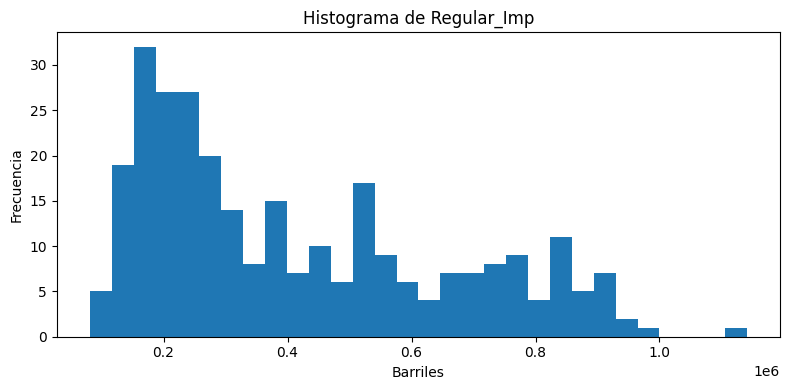

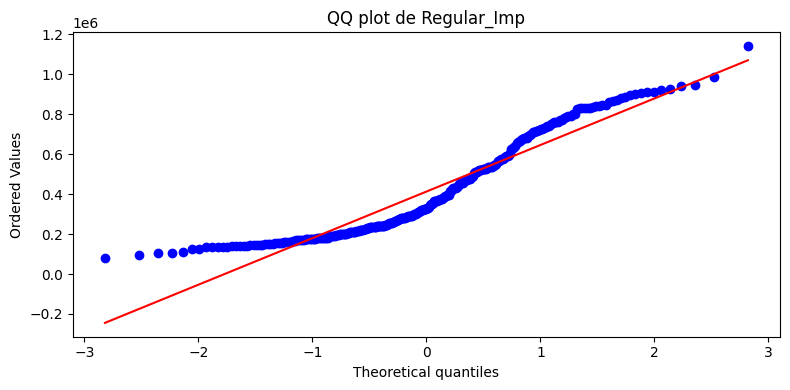

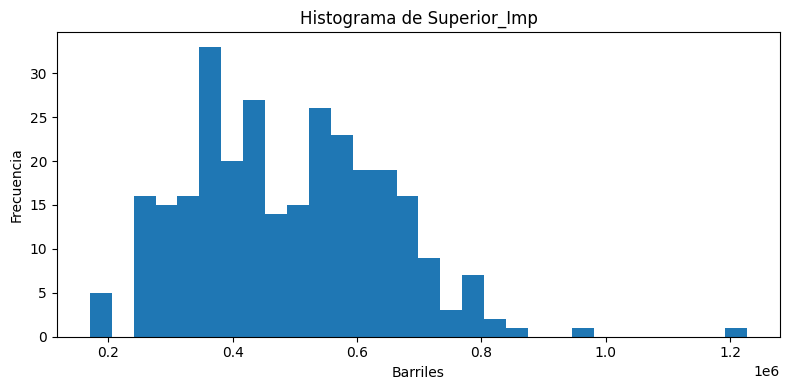

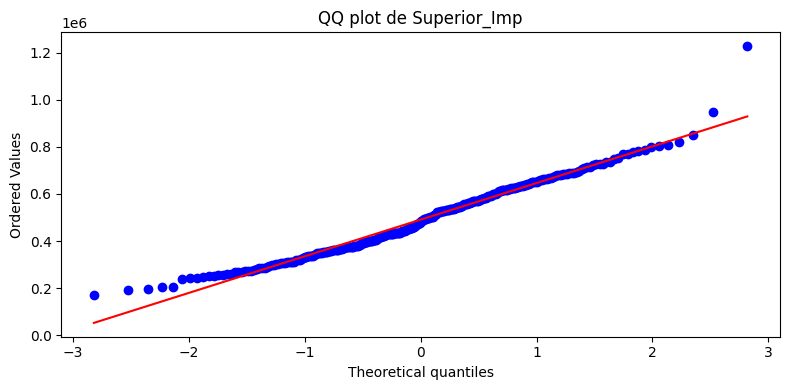

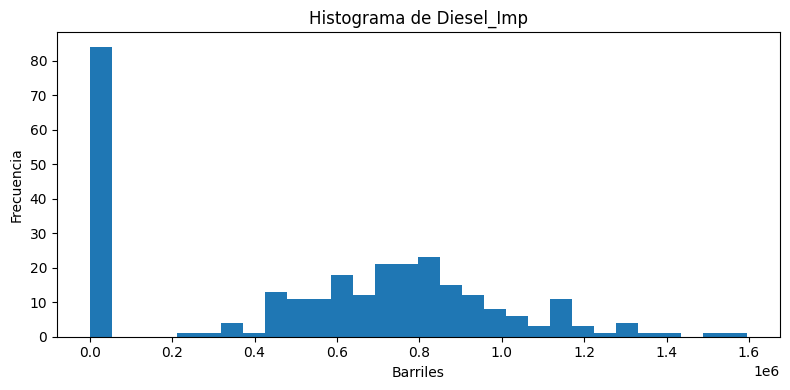

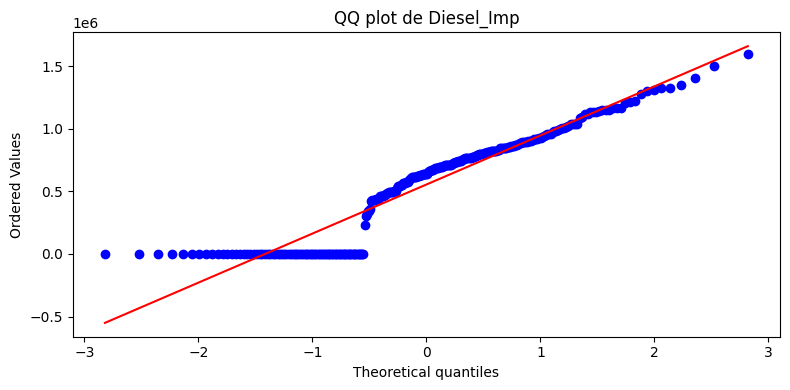

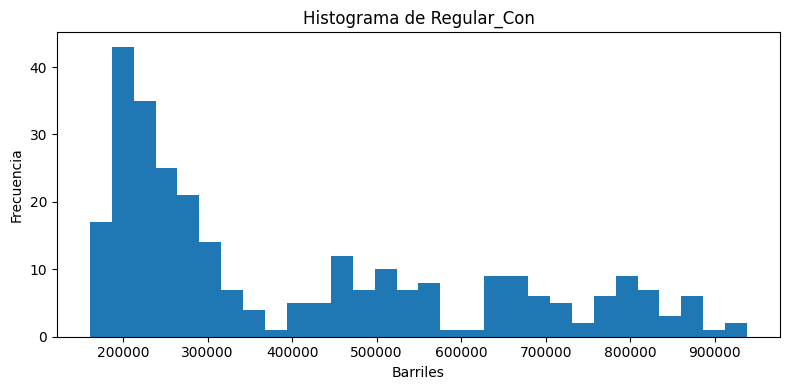

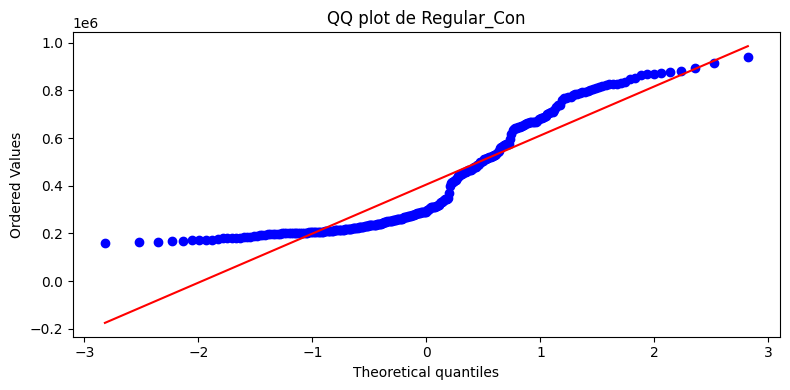

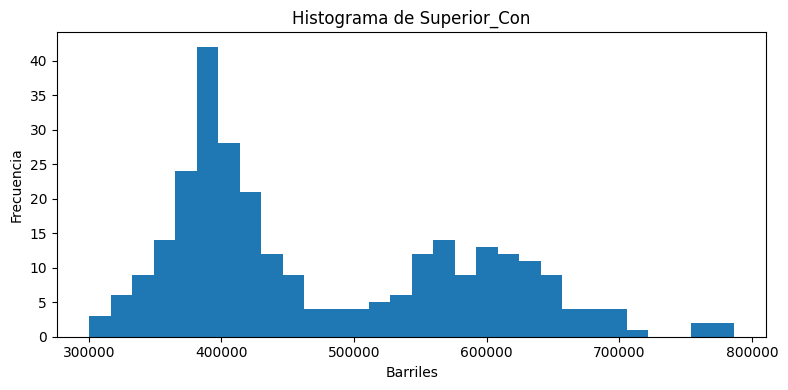

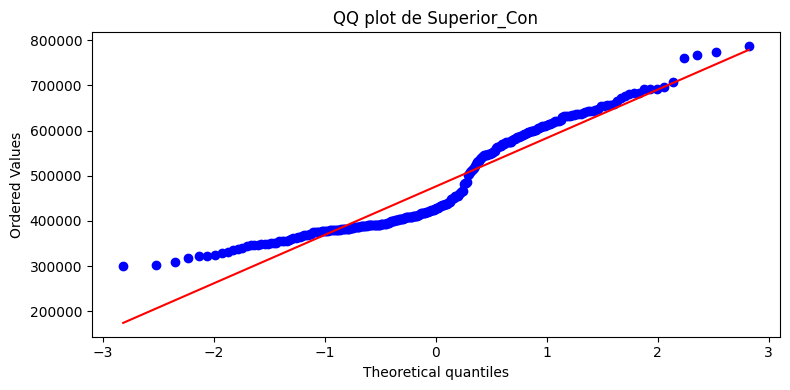

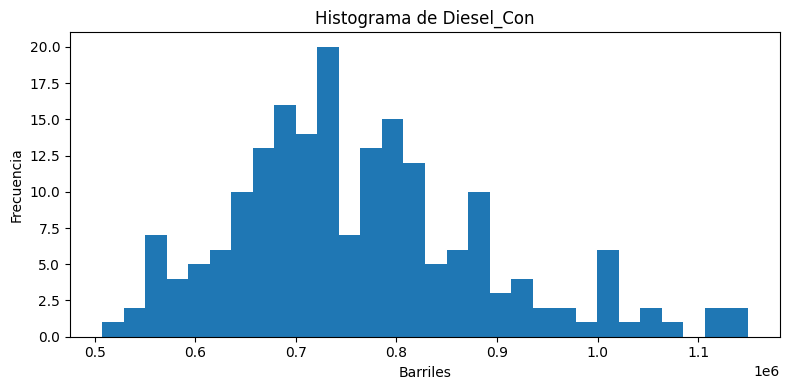

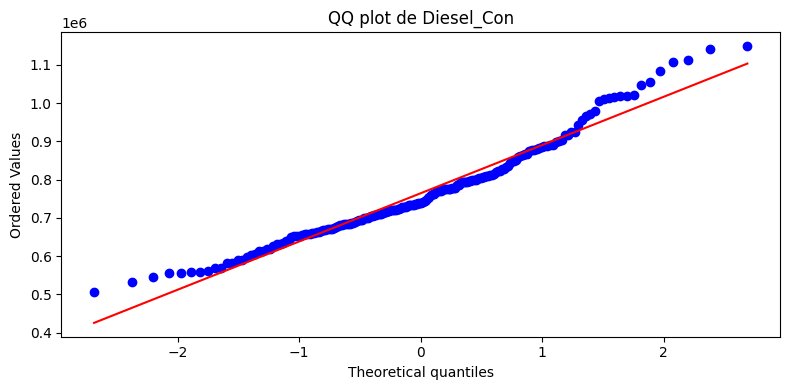

In [30]:
for col in df.columns:
    series = df[col].dropna()

    # Histograma
    plt.figure()
    plt.hist(series, bins=30)
    plt.title(f"Histograma de {col}")
    plt.xlabel("Barriles")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

    # QQ plot
    plt.figure()
    stats.probplot(series, dist="norm", plot=plt)
    plt.title(f"QQ plot de {col}")
    plt.tight_layout()
    plt.show()

### Series temporales completas y periodo COVID‑19

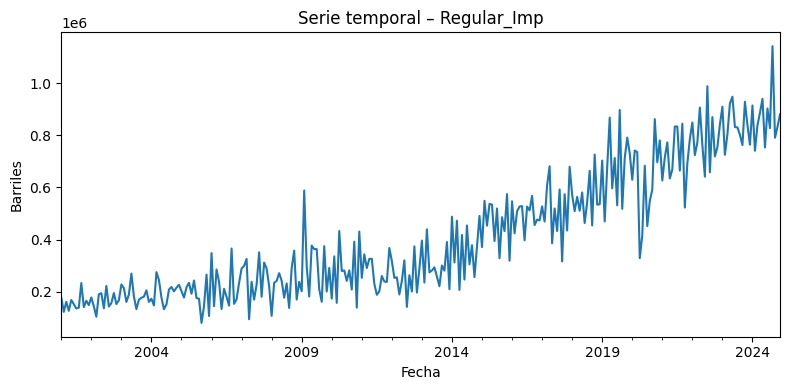

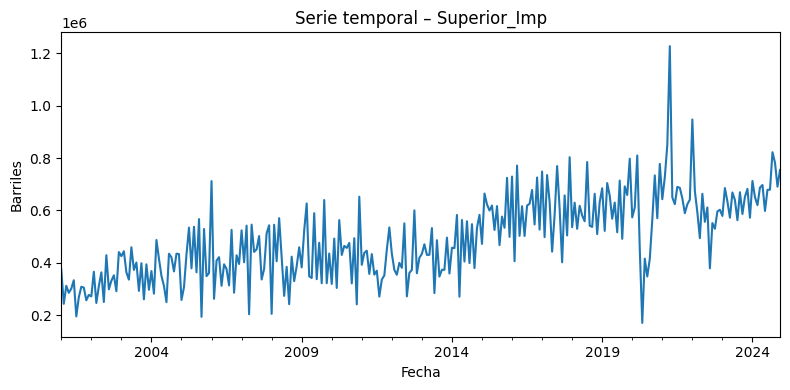

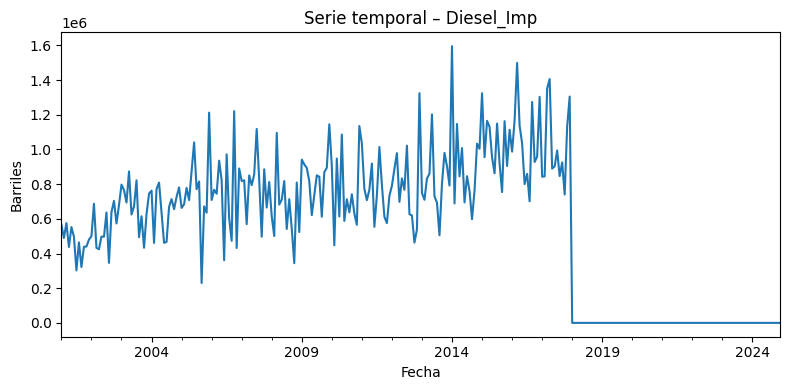

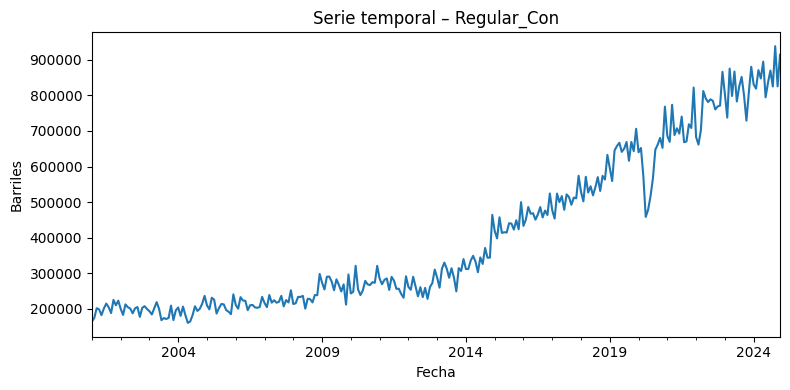

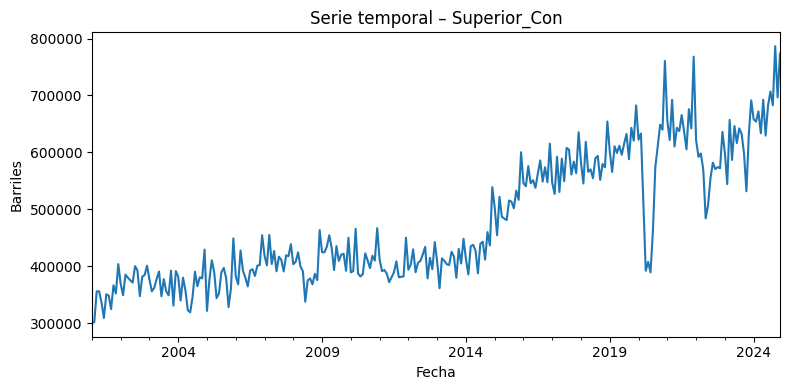

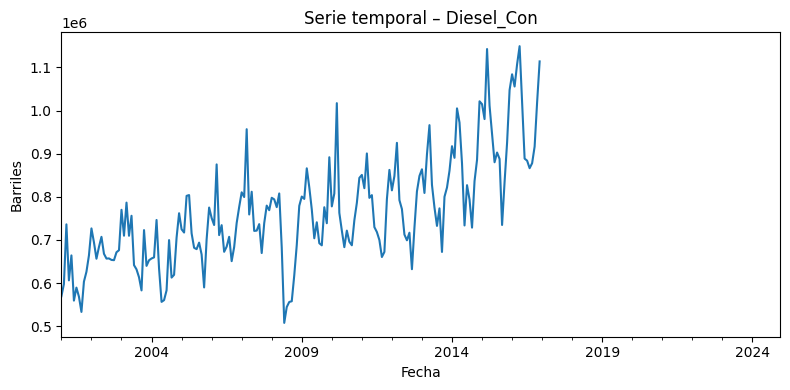

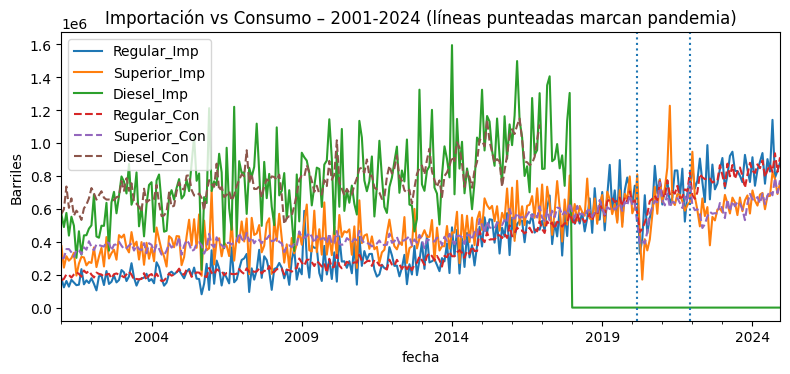

In [31]:
for col in df.columns:
    plt.figure()
    df[col].plot()
    plt.title(f"Serie temporal – {col}")
    plt.ylabel("Barriles")
    plt.xlabel("Fecha")
    plt.tight_layout()
    plt.show()

# Plot combinado: importaciones vs consumo
plt.figure()
for col in ["Regular_Imp", "Superior_Imp", "Diesel_Imp"]:
    df[col].plot(label=col)
for col in ["Regular_Con", "Superior_Con", "Diesel_Con"]:
    df[col].plot(label=col, linestyle='--')
plt.axvline(pd.Timestamp("2020-03-01"), linestyle=":")
plt.axvline(pd.Timestamp("2021-12-01"), linestyle=":")
plt.title("Importación vs Consumo – 2001‑2024 (líneas punteadas marcan pandemia)")
plt.ylabel("Barriles")
plt.legend()
plt.tight_layout()
plt.show()